## 1- Importing Packages

In [19]:
from kneed import KneeLocator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

## 2- Import Dataset

In [3]:
df = pd.read_csv("B:\ML Jadi\Clustering project\KMeans\Customer.csv")

## 3- Preprocessing

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### 3-1- Label encoding

In [6]:
le_Gender = preprocessing.LabelEncoder()
le_Gender.fit(df["Gender"].unique())
df["Gender"] = le_Gender.fit_transform(df["Gender"])

### 3-2-  Select features and define X

In [7]:
X = df[["Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"]]

### 3-3- Normalization

In [8]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.fit_transform(X)

## 4- DBSCAN

#### Before applying DBSCAN algorithm we need to specify its 2 parameters:

#### min_samples: The minimum number of points to be used to recognize a cluster should be: 2 * Data dimension. So MinPoint=8

#### eps: We find the K nearest neighbors for all the data points, and then get the sorted Kth column and plot it. Look for the knee point. That's epsilon.

In [9]:
nnbrs = NearestNeighbors(n_neighbors=8).fit(X)
neigh_dist, neigh_ind = nnbrs.kneighbors(X)
k_dist = np.sort(neigh_dist, axis = 0)[:, 7]

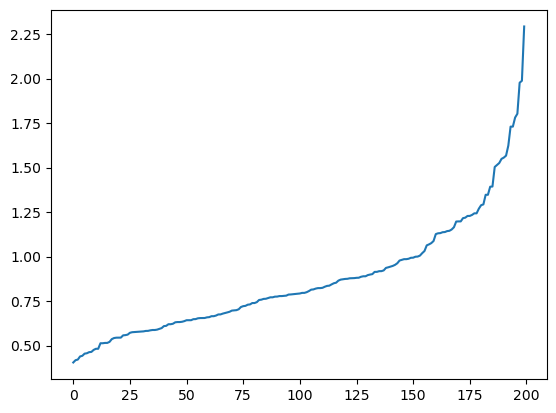

In [10]:
plt.plot(k_dist)

#### The knee point can occur at any point between 1 to 1.75. The points above the knee point are noise or outliers, and the points below the knee point belongs to a cluster. We have 2 options to find the exact knee point:
#### 1- Run DBSCAN based on different values of epsilon between 1 to 1.75 to find the best one.
#### 2- Use the KneeLocator() function:

In [24]:
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, 
                      curve = "concave", direction = "increasing", online=True)

### get the estimate of knee point

In [12]:
epsilon = kneedle.knee_y

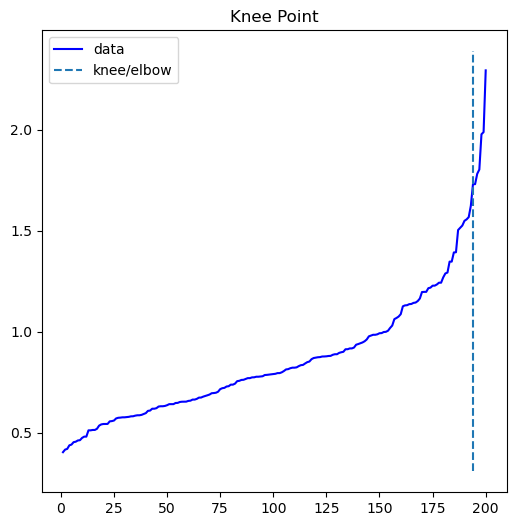

In [13]:
kneedle.plot_knee()
plt.show()

### Fit the model

In [15]:
db = DBSCAN(eps=epsilon, min_samples=8)
db.fit(X)
df["Labels"] = db.labels_

In [16]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Labels
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,1
3,4,0,23,16,77,1
4,5,0,31,17,40,1


In [17]:
db.labels_

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0], dtype=int64)

#### We have 2 clusters and no noise.

## 5- Calculate silhouette score

In [22]:
silhouette_average_score = silhouette_score(X, db.fit_predict(X))

In [23]:
silhouette_average_score

0.2776035125578272